# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from CMEP_TwoElectron import Two_Electron_Plasma
from CMEP import CMEP_Atom
from constants import *
# from hnc_Ng import  HNC_solver
# from qsps import *

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
        
        
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Ha_to_J = 4.359744e-18
k_B = 1.380649e-23 
m_p = 1.672621898e-27 # kg
eV_to_K = 11604.5250061598
J_to_erg = 1e7
Ha_to_erg = Ha_to_J*J_to_erg

# Function that sets up HNC QSP 

## Load TCCW Cases

In [2]:
AU_to_Pa  = 2.9421015697e13 
Pa_to_bar = 1e-5
AU_to_bar = AU_to_Pa*Pa_to_bar 

In [3]:
cases_converged_thusfar = {'H1':True,'C1':True, 'Al1':True, 'Cu1': True, 'Be1': True, 'Au1': False, 'H2': True, 'H3': True, 'C2': False, 'C3': True, 'Al2': False, 'Al3': True,
 'Cu2': False, 'Cu3': True, 'H11': False, 'H21': False, 'H31': False, 'C11': False, 'C21': False, 'C31': False, 'Al11': False, 'Al21': False, 
 'Al31': False, 'Cu11': False, 'Cu21': False, 'Cu31': False, 'H12': True, 'H22': True, 'H32': False, 'C12': True, 'C22': False, 'C32': False, 
 'Al12': True, 'Al22': False, 'Al32': False, 'Cu12': True, 'Cu22': False, 'Cu32': False, 'H13': True, 'H23': True, 'H33': True, 'C13': True,
  'C23': True, 'C33': False, 'Al13': False, 'Al23': False, 'Al33': False, 'Cu13': True, 'Cu23': False, 'Cu33': False, 'H14': False, 'H24': False, 
  'H34': False, 'C14': False, 'C24': False, 'C34': False, 'Al14': False, 'Al24': False, 'Al34': False, 'Cu14': False, 'Cu24': False, 'Cu34': False,
   'H15': False, 'H25': False, 'H35': False, 'C15': False, 'C25': False, 'C35': False, 'Al15': False, 'Al25': False, 'Al35': False, 'Cu15': False,
    'Cu25': False, 'Cu35': False, 'H16': False}

In [4]:
mixture_file = "/home/zach/plasma/hnc/data/TCCW_single_species_data.csv"
tccw_mixture_data = read_csv(mixture_file)
tccw_cases = [tccw_mixture_data.iloc[n] for n in range(len(tccw_mixture_data))]


tccw_case = tccw_cases[2]
α = 0.1
case_converged=False
case_attempts=0
case_num= tccw_case[' ']
case_id = tccw_case['Case ID']
ni_cc = tccw_case['Number Density [N/cc]']
Te_eV = 70 #tccw_case['Temperature [eV]']
Ti_eV = Te_eV
Z = tccw_case['Atomic Number']
Zbar = tccw_case['Zbar (TFDW)']
P_GP_AU  = tccw_case['p (Bar)']/AU_to_bar
A = tccw_case['Atomic Weight [a.u.]']
r_s_cc = tccw_case['Wigner-Seitz Radius [cm]']
r_c = tccw_case['Average-Bound Radius [cm]']/r_s_cc
if r_c>1:
    r_c=1e-5
print('\n______________________________\nCase num: {0} Case ID: {1}'.format(case_num, case_id))
print("Te = {0:.3e} eV, n_i = {1:.3e} 1/cc, r_c/r_s = {2:.3f}".format(Te_eV, ni_cc, r_c))
print("Te = {0:.3e} K, ρ = {1:.3e} [g/cc] ".format(Te_eV*eV_to_K, 1e3*ni_cc*m_p*A ))
print("P  = {0:.3e} [bar] = {1:.3e} [AU]".format(P_GP_AU*AU_to_bar, P_GP_AU))


______________________________
Case num: 2 Case ID: Al1
Te = 7.000e+01 eV, n_i = 6.030e+22 1/cc, r_c/r_s = 0.218
Te = 8.123e+05 K, ρ = 2.721e+00 [g/cc] 
P  = 1.830e+05 [bar] = 6.220e-04 [AU]


In [10]:
atom_2e = Two_Electron_Plasma(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Zbar,
             βu_options = {'add_bridge':False,'bridge':'yukawa', 'pseudopotential':False}, 
             qsp_options= {'r_c':0.0,'which_Tij':'thermal'},
             hnc_options= {'kappa_multiscale':10, 'R_max':5,'N_bins':500,'oz_method':'svt'},
             hnc_solve_options={'alpha_Picard':0.5})
atom_2e.run_hnc()


Te_in_eV: 70.000
Ti_in_eV: 70.000
Warning, small T<<EF disagree with DW. Need to adjust?
Warning, setting qsp based on self βP
0: Initial condition Total Error: 1.184e+00
Exiting status 0, reverting to best index so far: 36
Final iter:37, Total Error: 8.724e-09


In [6]:
atom = CMEP_Atom(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Zbar, 
                 βu_options = {'add_bridge':True,'bridge':'yukawa', 'pseudopotential':False}, 
                 qsp_options={'r_c':0},
                 hnc_options={'kappa_multiscale':10, 'R_max':10,'N_bins':1000},
                 hnc_solve_options={'alpha_Picard':0.5})
atom.run_hnc()
# atom.get_cp()

Te_in_eV: 70.000
Ti_in_eV: 70.000
0: Initial condition Total Error: 1.088e+00
Exiting status 0, reverting to best index so far: 27
Final iter:28, Total Error: 7.788e-09


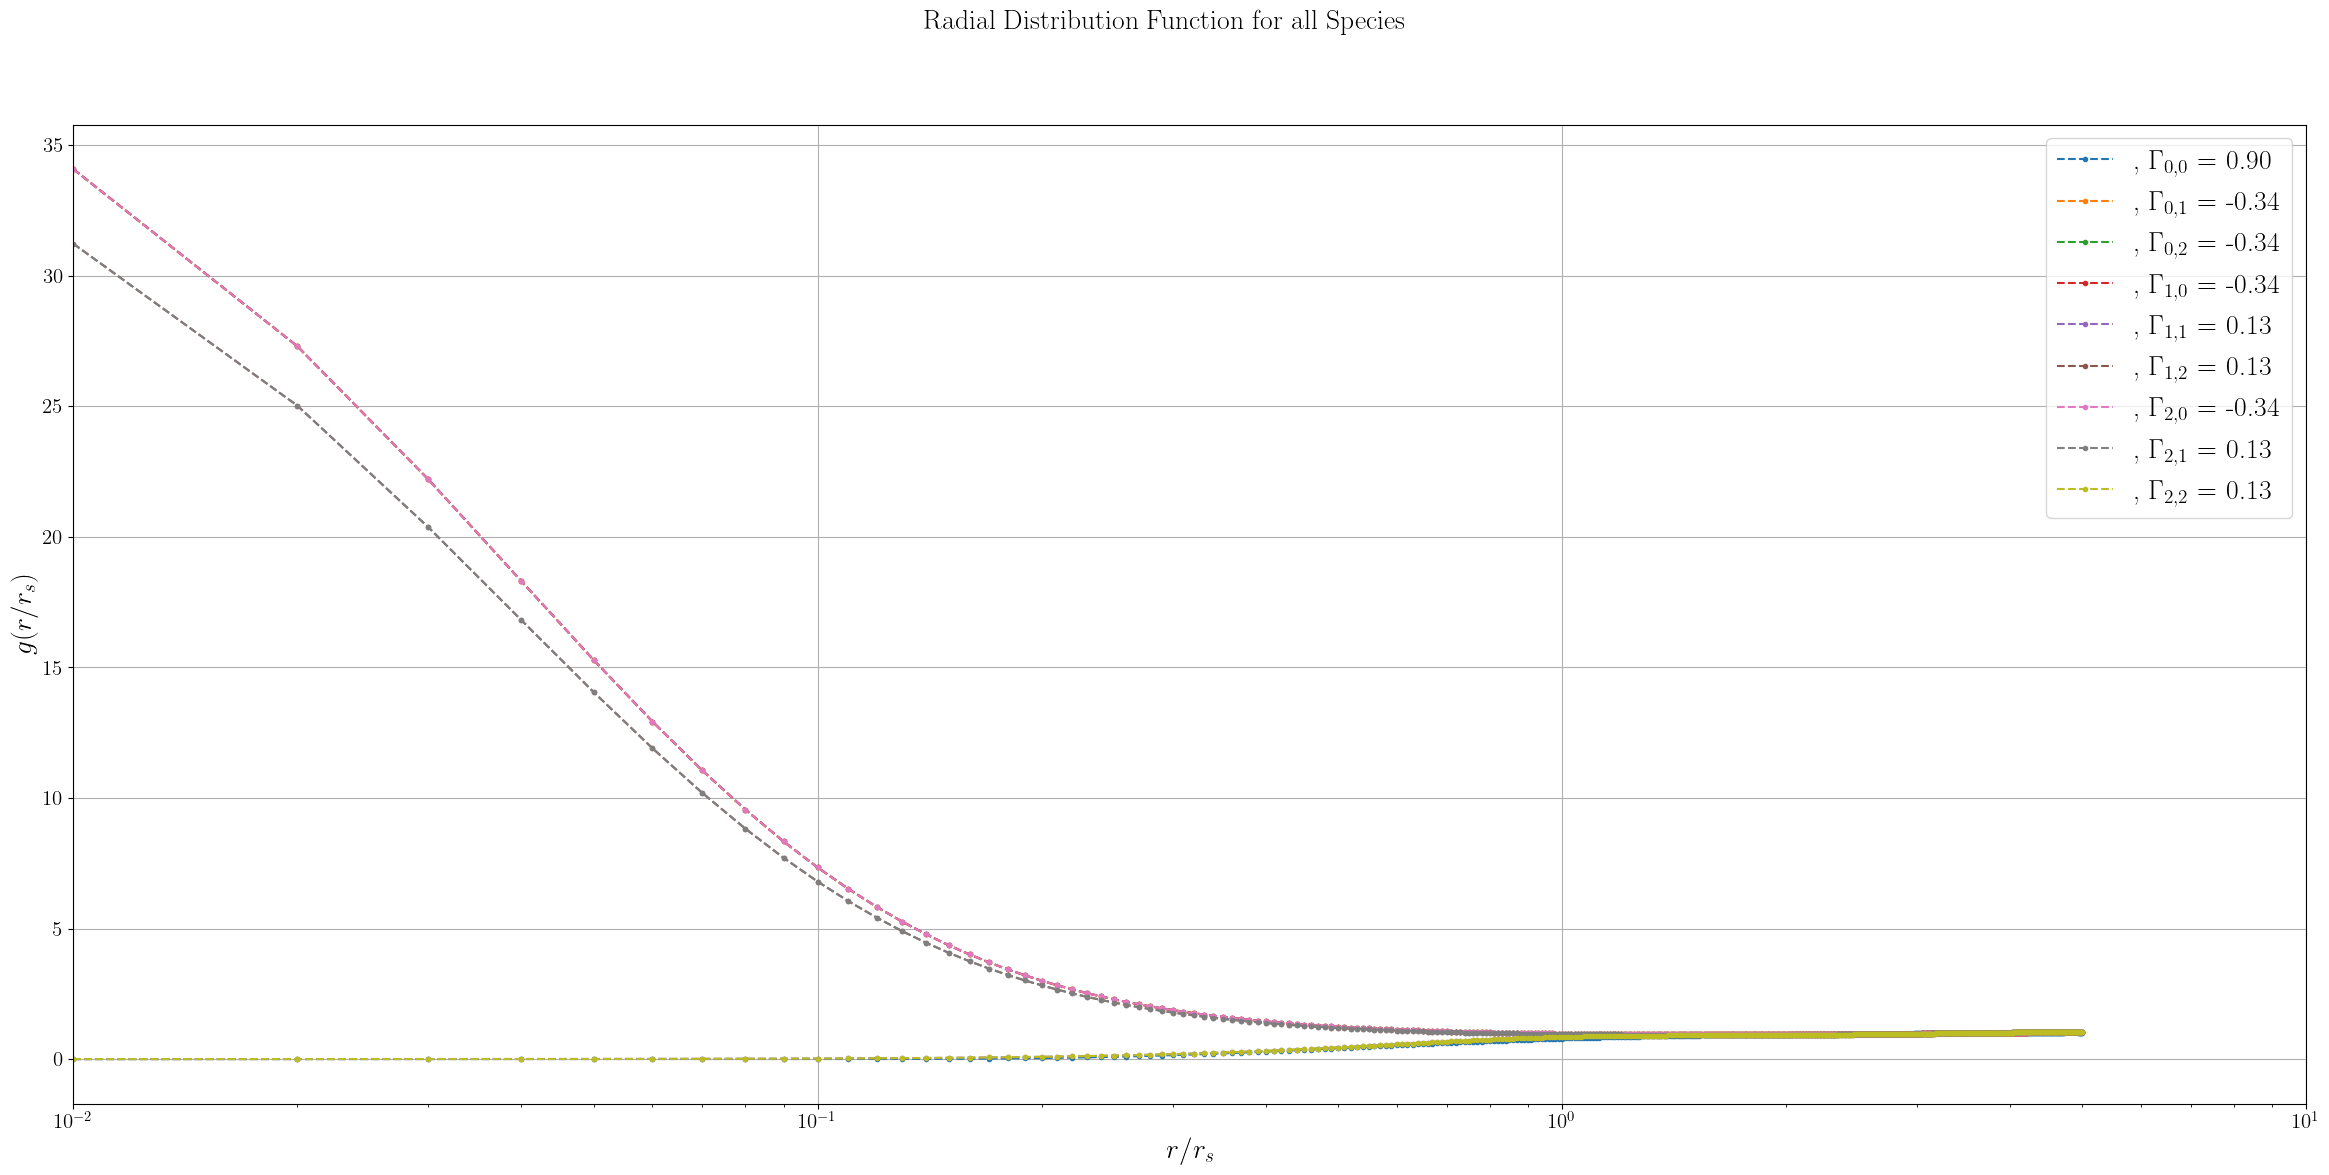

In [11]:
atom_2e.hnc.plot_g_all_species()

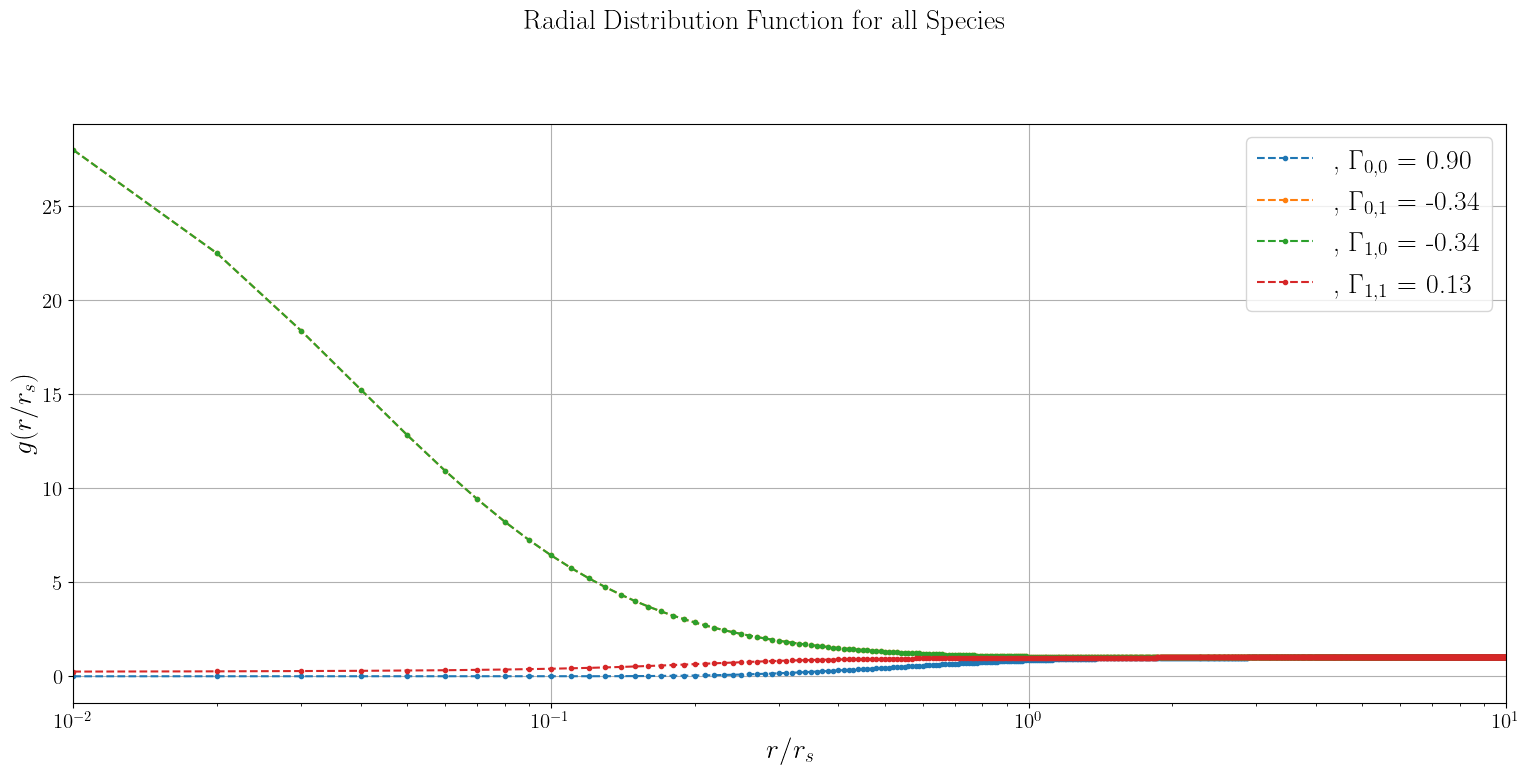

In [12]:
atom.hnc.plot_g_all_species()

In [9]:
np.sum(4*π*AA_data['r[a_0]']**2*AA_data['n[unbound]'])

NameError: name 'AA_data' is not defined

In [ ]:
AA_data = read_csv("/home/zach/plasma/atoMEC/examples/density.csv", delim_whitespace=True, header=0)

fig, ax = plt.subplots(figsize=(10,8))
nf_0 = Zbar/(4/3*np.pi*atom.qsp.ri**3)
ax.plot(AA_data['r[a_0]'], np.array(AA_data['n[unbound]'])/nf_0,'k.' ,label="AA" )
ax.plot(atom_2e.hnc.r_array*atom_2e.qsp.ri, atom_2e.hnc.h_r_matrix[1,0]+1,'--', label='2 electron SVT ')
ax.plot(atom.hnc.r_array*atom.qsp.ri, atom.hnc.h_r_matrix[1,0]+1,'--', label='1 electron SVT ')
# ax.plot(atom_oz.hnc.r_array*atom_oz.qsp.ri, atom_oz.hnc.h_r_matrix[0,0]+1,'--', label='my OZ CHNC')

ax.set_xlim(0,6)
ax.set_ylabel(r'$h_{ii}$',fontsize=20)
ax.set_xlabel(r'$r$ [A.U.]',fontsize=20)
ax.tick_params(labelsize=20)
ax.set_yscale('symlog', linthresh=1)
ax.legend(fontsize=15)

# Run Cases

In [53]:

for tccw_case in tccw_cases[6:]:
    α = 0.1
    case_converged=False
    case_attempts=0
    case_num= tccw_case[' ']
    case_id = tccw_case['Case ID']
    ni_cc = tccw_case['Number Density [N/cc]']
    Te_eV = tccw_case['Temperature [eV]']
    Ti_eV = Te_eV
    Z = tccw_case['Atomic Number']
    Zbar = tccw_case['Zbar (TFDW)']
    P_GP_AU  = tccw_case['p (Bar)']/AU_to_bar
    A = tccw_case['Atomic Weight [a.u.]']
    r_s_cc = tccw_case['Wigner-Seitz Radius [cm]']
    r_c = tccw_case['Average-Bound Radius [cm]']/r_s_cc
    if r_c>1:
        r_c=1e-5
    print('\n______________________________\nCase num: {0} Case ID: {1}'.format(case_num, case_id))
    print("Te = {0:.3e} eV, n_i = {1:.3e} 1/cc, r_c/r_s = {2:.3f}".format(Te_eV, ni_cc, r_c))
    print("Te = {0:.3e} K, ρ = {1:.3e} [g/cc] ".format(Te_eV*eV_to_K, 1e3*ni_cc*m_p*A ))
    print("P  = {0:.3e} [bar] = {1:.3e} [AU]".format(P_GP_AU*AU_to_bar, P_GP_AU))
    
    α = 1
    converged=False
    while not converged:
        atom = CMEP_Atom(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Zbar, 
                     βu_options = {'add_bridge':True}, 
                     qsp_options={'r_c':r_c},
                     hnc_options={'kappa_multiscale':10, 'R_max':10,'N_bins':1000},
                     hnc_solve_options={'alpha_Picard':α})
        atom.run_hnc()
        if atom.hnc.newton_succeed==True:
            converged=True
        else:
            α*=0.5
            
    atom.get_cp()


______________________________
Case num: 6 Case ID: H2
Te = 2.000e-01 eV, n_i = 5.980e+25 1/cc, r_c/r_s = 0.530
Te = 2.321e+03 K, ρ = 1.008e+02 [g/cc] 
P  = 1.620e+10 [bar] = 5.506e+01 [AU]
0: Initial condition Total Error: 3.767e+01


/home/zach/plasma/hnc/hnc_Ng.py:566: RuntimeWarning: overflow encountered in exp
  hnc_err = np.linalg.norm(- 1 - self.h_r_matrix   + np.exp( -self.βu_r_matrix + self.h_r_matrix - self.c_r_matrix ))/np.sqrt(self.N_bins*self.N_species**2)
/home/zach/plasma/hnc/hnc_Ng.py:327: RuntimeWarning: overflow encountered in exp
  h_r_matrix = -1 + np.exp(γs_r_matrix - self.βu_s_r_matrix) # 2. γ_r,u_s_r  -> h_r   (HNC)
/home/zach/plasma/hnc/hnc_Ng.py:425: RuntimeWarning: overflow encountered in exp
  tot_eqn =  1 + h_r_matrix  - np.exp(-self.βu_s_r_matrix + h_r_matrix - c_s_r_matrix )
/home/zach/plasma/hnc/hnc_Ng.py:451: RuntimeWarning: overflow encountered in exp
  h_r_matrix = -1 + np.exp(γs_r_matrix - self.βu_s_r_matrix) # 2. γ_r,u_s_r  -> h_r   (HNC)
/home/zach/plasma/hnc/hnc_Ng.py:574: RuntimeWarning: invalid value encountered in subtract
  Δ_err = np.array(self.tot_err_list[-iters_to_check:-2]) - np.array(self.tot_err_list[-iters_to_check + 1:-1])


QUIT: Total error infinite.
Exiting status 1, reverting to best index so far: 2
Final iter:11, Total Error: 8.565e+00


KeyboardInterrupt: 

# Only Ion

In [39]:
atom.run_onlyion_hnc()

0: Initial condition Total Error: 2.219e+01
Exiting status 1, reverting to best index so far: 1000
Final iter:1001, Total Error: 1.614e-04


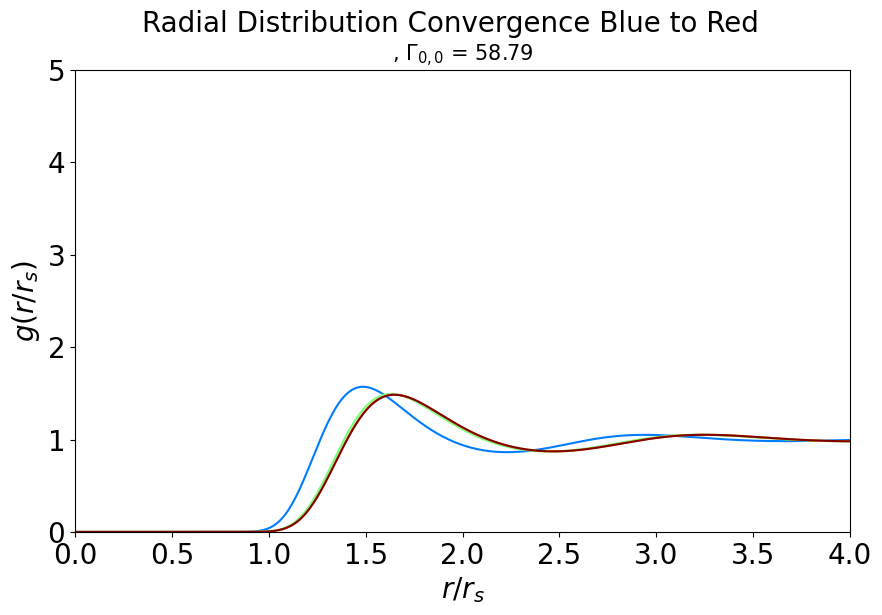

In [40]:
atom.onlyion_hnc.plot_species_convergence_g()

In [21]:
# c_s_k_guess = atom.hnc.c_s_k_matrix.copy()*0
c_s_k_guess[0,0] = atom.onlyion_hnc.c_s_k_matrix[0,0]*0.


atom.run_hnc(c_s_k_guess = c_s_k_guess)

0: Initial condition Total Error: 1.817e+05


KeyboardInterrupt: 


# Make atom

In [157]:
Zbar_list  = np.linspace(3,Zbar, num=100)
# Zbar_list = [1,3]
atom_list= []
for i, Zbar_i in enumerate(Zbar_list):
    print("Zbar = {0:.3f}".format( Zbar_i ))
    
    atom = CMEP_Atom(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Zbar_i, 
                 βu_options = {'add_bridge':True}, 
                 qsp_options={'r_c':r_c},
                 hnc_options={'kappa_multiscale':10},
                 hnc_solve_options={'alpha_Picard':0.5})
    if i>=1:
        Z2_matrix = [[Zbar_list[i]]]
        guess_2 = 
        c_s_k_guess = atom_list[-1].hnc.c_s_k_matrix
        c_s_k_guess[0,0] *= (Zbar_list[i]/Zbar_list[i-1])**2 
        c_s_k_guess[0,1] *= (Zbar_list[i]/Zbar_list[i-1])**1 
        c_s_k_guess[1,0] *= (Zbar_list[i]/Zbar_list[i-1])**1
#         c_s_k_guess[0,0] *= 0
    else:
        c_s_k_guess *=0
    atom.run_hnc(c_s_k_guess=c_s_k_guess)
    atom_list.append( atom )

Zbar = 3.000
0: Initial condition Total Error: 3.369e+00
Exiting status 0, reverting to best index so far: 155
Final iter:158, Total Error: 1.547e-07
Zbar = 3.051
0: Initial condition Total Error: 2.910e-02
Exiting status 0, reverting to best index so far: 167
Final iter:171, Total Error: 1.862e-07
Zbar = 3.102
0: Initial condition Total Error: 3.152e-02
Exiting status 0, reverting to best index so far: 279
Final iter:284, Total Error: 1.888e-07
Zbar = 3.153
0: Initial condition Total Error: 3.412e-02
Exiting status 0, reverting to best index so far: 862
Final iter:866, Total Error: 1.835e-07
Zbar = 3.205
0: Initial condition Total Error: 3.694e-02
QUIT: HNC error infinite.
Exiting status 1, reverting to best index so far: 3
Final iter:145, Total Error: 1.614e-02

Root Finder:  True The solution converged. final err: 7.133e-11
Zbar = 3.256
0: Initial condition Total Error: 4.003e-02
QUIT: HNC error infinite.
Exiting status 1, reverting to best index so far: 3
Final iter:60, Total Error

KeyboardInterrupt: 

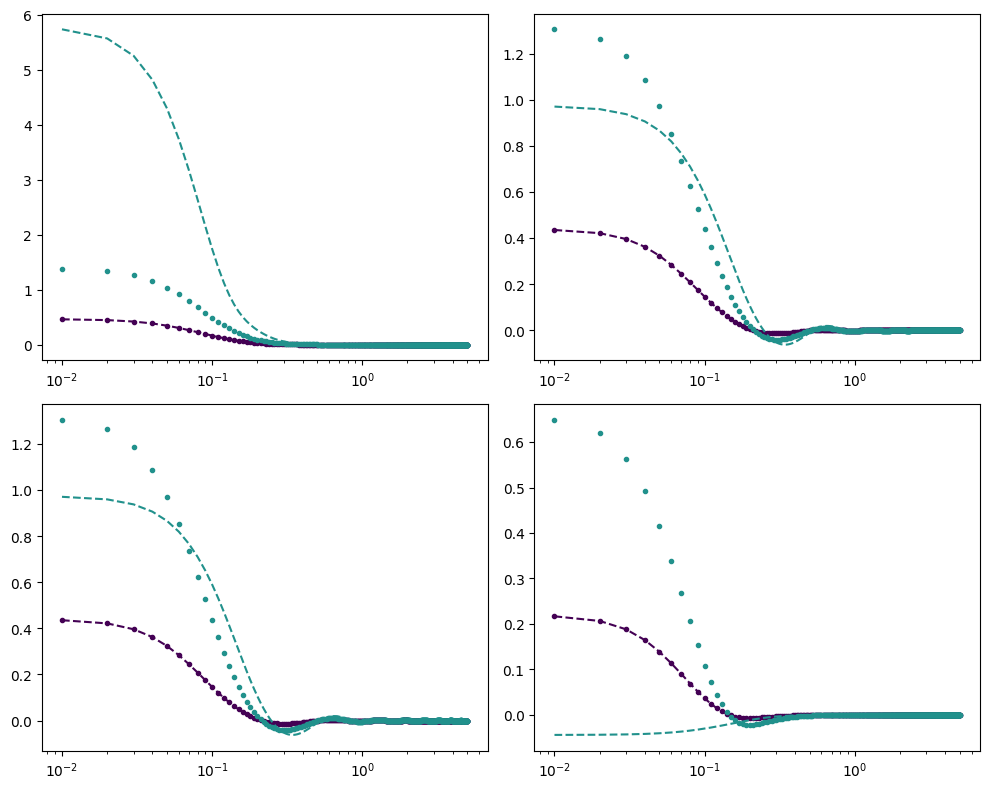

In [154]:
fig, axs = plt.subplots(2, 2, facecolor='w', figsize=(10,8) )

atom3_guess = atom2.hnc.c_s_k_matrix + (atom2.hnc.c_s_k_matrix-atom1.hnc.c_s_k_matrix)/(2-1)*(3-2) 
atom3_guess = atom2.hnc.c_s_k_matrix + (atom2.hnc.c_s_k_matrix/atom1.hnc.c_s_k_matrix)/(2-1)*(3-2) 

for i in range(2):
    for j in range(2):
        for k, atom in enumerate(atom_list):
            color = plt.cm.viridis(k/len(atom_list))
            Z_factor = (Zbar_list[0]/Zbar_list[k])**-1
            axs[i, j].plot(atom.hnc.r_array, atom.hnc.c_s_k_matrix[i,j], '--',label= "Zbar", color= color)
            axs[i, j].plot(atom.hnc.r_array, Z_factor*atom_list[0].hnc.c_s_k_matrix[i,j],'.', label= "Zbar", color= color)
#             axs[i, j].plot(atom.hnc.r_array, atom2.hnc.c_s_k_matrix[i,j], label= "Zbar=2")
#             axs[i, j].plot(atom.hnc.r_array, atom6.hnc.c_s_k_matrix[i,j], label= "Zbar=6")
#         axs[i, j].plot(atom2.hnc.r_array, atom2.hnc.c_s_k_matrix[i,j]-atom1.hnc.c_s_k_matrix[i,j], label= "Zbar=2/1")
#         axs[i, j].plot(atom2.hnc.r_array, atom3.hnc.c_s_k_matrix[i,j]-atom2.hnc.c_s_k_matrix[i,j], label= "Zbar=3/2")
#         axs[i, j].plot(atom2.hnc.r_array, atom3_guess[i,j] , 'k--', label= "Zbar=3 (guess)")
        
#         axs[i, j].plot(atom3.hnc.r_array, atom3.hnc.c_s_k_matrix[i,j],'k', label= "Zbar=3")
#         axs[i, j].plot(atom100.hnc.r_array, atom80.hnc.c_s_k_matrix[i,j]-100/80*atom100.hnc.c_s_k_matrix[i,j], label= "80/100 eV")
#         axs[i, j].plot(atom100.hnc.r_array, atom60.hnc.c_s_k_matrix[i,j], label= "60 eV")
         
#         axs[i, j].plot(atom100.hnc.r_array, T_rescale[i,j]*atom100.hnc.c_s_k_matrix[i,j], label= "rescaled 100 eV")
        
        axs[i,j].set_xscale('log')
#         axs[i, j].set_yscale('symlog', linthresh=0.1)
#         axs[i, j].legend()
        
plt.tight_layout()

In [58]:
atom.get_cp(ε_derivative=1e-6, ε_table=1e-1, N_table= 2 )

0: Initial condition Total Error: 5.592e+00
QUIT: Last 10 iterations error has been increasing
Exiting status 2, reverting to best index so far: 87
Final iter:97, Total Error: 2.446e-02


KeyboardInterrupt: 

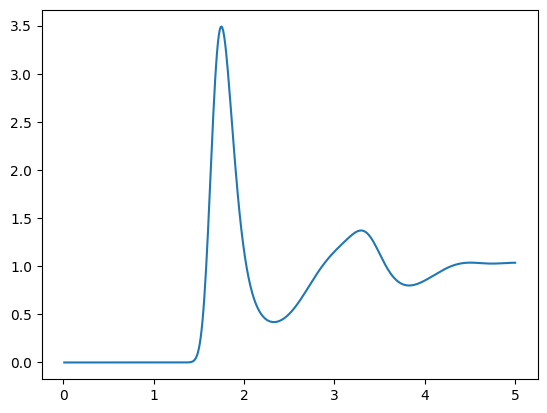

In [27]:
fig, ax = plt.subplots()

# ax.plot(atom.hnc.r_array, atom.hnc.βueff_r_matrix[0,0])
ax.plot(atom.hnc.r_array, atom.hnc.h_r_matrix[0,0]+1)
# ax.set_yscale('symlog', linthresh=1)

###### Hydrogen H1

c_p = 1.667e+08 [J/m^3/K] = 1.667e+09 [erg/cc/K]


c_p^ideal = 2.064e+07 [J/m^3/K] = 2.064e+08 [erg/cc/K]

c_v = 1.229e+08 [J/m^3/K] = 1.229e+09 [erg/cc/K]


γ = cp/cv = 1.357e+00

###### Aluminum Al1

c_p = 5.560e+06 [J/m^3/K] = 5.560e+07 [erg/cc/K]

c_p^ideal = 2.081e+06 [J/m^3/K] = 2.081e+07 [erg/cc/K]

c_v = 3.559e+06 [J/m^3/K] = 3.559e+07 [erg/cc/K]

c_p_over_nkB = 6.678

c_v_over_nkB = 4.275

γ = cp/cv = 1.562e+00

##### Carbon C1

c_p = 1.005e+09 [J/m^3/K] = 1.005e+10 [erg/cc/K]

c_p^ideal = 1.729e+07 [J/m^3/K] = 1.729e+08 [erg/cc/K]

c_v = 7.410e+08 [J/m^3/K] = 7.410e+09 [erg/cc/K]

γ = cp/cv = 1.357e+00

##### Copper Cu1
c_p = 6.829e+07 [J/m^3/K] = 6.829e+08 [erg/cc/K]

c_p^ideal = 2.930e+06 [J/m^3/K] = 2.930e+07 [erg/cc/K]

c_v = 4.460e+07 [J/m^3/K] = 4.460e+08 [erg/cc/K]

γ = cp/cv = 1.531e+00

In [17]:
# Compare to Ichimaru
n_AU = ni_cc * (1e2*aB)**3
E_over_nkBT = atom.U/( Te*N )
P_over_nkBT = atom.P/(Te*n_AU)
c_p_over_nkB = C_p_AU/N #c_p_SI_vol/k_B/(ni_cc*1e6)
E_over_nkBT, P_over_nkBT, c_p_over_nkB  

(42.49760051868732, 18.042374008620044, 58.25783917342605)

In [18]:
# 2x2
#(16.078004224152146, 7.958852940677674, 20.391840227664225)
# 3x3
#(17.29156071613095, 9.41653222069282, 19.954770080816058)
# 4x4
#(17.29156071613095, 9.41653222069282, 20.31577883096223)
# 6x6
#(17.29156071613095, 9.41653222069282, 20.341775951597302)



In [ ]:
#cp units are J/K/m^3

In [ ]:
c_p_SI_vol *J_to_erg*1e-6 # from J/K/m^3 to erg/K/cc

In [ ]:
(c_p_over_nkB*ni_cc * k_B*1e6)/1e8 # in erg/

In [ ]:
# Ideal
# (1.503495387998133, 1.0020009999999997, 2.5033223241241656)


# βu_eff matching

In [ ]:
from pandas import read_csv
from scipy.interpolate import interp1d
# luke_file = '/home/zach/plasma/atomic_forces/data/Al_T0p5_tab.lammps.PAIR'
luke_file = '/home/zach/plasma/atomic_forces/data/Al_T1_tab.lammps.PAIR'

luke_data = read_csv(luke_file ,delim_whitespace=True,header=3, names=['r [A]','V [eV]','F [eV/A]'])
# luke_r, luke_βV = 1e-10/aB/r_s*luke_data['r [A]'], 1/(Te/eV)*luke_data['V [eV]']
luke_r, luke_βV = 1e-8/r_s*luke_data['r [A]'], 1/(Te/eV)*luke_data['V [eV]']
luke_βV_function = interp1d(luke_r, luke_βV,fill_value='extrapolate',bounds_error=False)

In [ ]:
from scipy.optimize import curve_fit

class βu_fit():
    def __init__(self, func, r_array, y_data, initial_guess):
        self.r = r_array
        self.y = y_data
        self.y_vals = curve_fit(func, r_array, y_data, maxfev=int(1e5), p0=initial_guess)
        self.y_fit  = func(r_array, *self.y_vals[0])
        self.err = np.linalg.norm(self.y_fit-self.y)
        print(func.__name__ + " error: {0:.3e} ".format(self.err))

def yukawa_plus(r, a, b, c, d):
    return  a/r*np.exp(-b*r)/(1+np.exp(c*(r-d)))

def yukawa_plus_gaussian(r, a ,b ,c, d ,e, f, g):
    return  a/r*np.exp(-b*r)/(1+np.exp(c*(r-d))) + e*np.exp(-(f-r)**2/g)

def yukawa_plus_cos(r, a ,b ,c, d , h, i, j, k, l):
    return  a/r*np.exp(-b*r)/(1+np.exp(c*(r-d))) + h*np.cos((r-i)*j*np.exp(-k*r))*np.exp(-l*r)

def yukawa_plus_gaussian_cos(r, a ,b ,c, d ,e, f, g, h, i, j, k, l):
    return  a/r*np.exp(-b*r)/(1+np.exp(c*(r-d))) + e*np.cos((r-f)*g*np.exp(-h*r))*np.exp(-i*r) + j*np.exp(-(k-r)**2/l)


In [ ]:
atom = atom_highres

In [ ]:
atom.invert_HNC_OZ([1])
fit1 = βu_fit(yukawa_plus, atom.r_array, atom.βueff_r_matrix[0,0], initial_guess=[   atomqsp.Γii, atomqsp.get_κ(),2 , 1])
try: 
    fit2 = βu_fit(yukawa_plus_cos, atom.r_array, atom.βueff_r_matrix[0,0], initial_guess=[  *fit1.y_vals[0], 1, 0.01, 1 , 10, 2])
except:
    pass
try:
    fit3 = βu_fit(yukawa_plus_gaussian_cos, atom.r_array, atom.βueff_r_matrix[0,0], initial_guess=[  *fit2.y_vals[0], -1, 1.9, 1])
except:
    pass

In [ ]:
luke_r

In [ ]:
fig, ax = plt.subplots(figsize=(8,6),facecolor='w')
fig.suptitle(r"{0} $T=${1:.1f} eV, $r_i$={2:.2f}".format(case_id, Te/eV, atomqsp.ri), fontsize=20)


yukawa_matrix = (atom.Gamma[:,:,np.newaxis]/atom.r_array * np.exp(-atom.r_array*atomqsp.get_κ())[np.newaxis,np.newaxis,:] ) [:-1,:-1]
coulomb_matrix = (atom.Gamma[:,:,np.newaxis]/atom.r_array) [:-1,:-1]

ax.plot(atom.r_array, atom.βu_r_matrix[0,0], 'k--',label='Initial')
ax.plot(atom.r_array, yukawa_matrix[0,0],'k-.', label="Yukawa")

ax.plot(atom.r_array, atom.βueff_r_matrix[0,0],color=colors[0], label='Effective')    
ax.plot(luke_r, luke_βV,'r-', label='Luke Force Match')

ax.set_ylim(np.min([-10, 2*np.min(atom.βueff_r_matrix[0,0])]), np.max([1e3, 2*np.max(atom.βueff_r_matrix[0,0])]))
ax.tick_params(labelsize=20)
ax.set_xlabel(r"$r/r_s$",fontsize=20)
ax.set_ylabel(r'$\beta u(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)

ax.set_xlim(0, 5)
ax.set_yscale('symlog',linthresh=1)
ax.tick_params(labelsize=15)
ax.legend(fontsize=10)
fig.tight_layout()